In [1]:
from gensim.models import Word2Vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
sentences = ["My dog ate the food",
             "my cat ate the food",
             "his cat drank the water", 
             "his dog drank the water",
             "her cat drank the water", 
             "her fish drank the water",
             "our fish ate the food",
             "your fish drank the drink",
             "our dog ate the food",
             "your cat drank the drink"]
from gensim.utils import simple_preprocess

In [3]:
corpus = [simple_preprocess(sentence) for sentence in sentences]
print corpus

[[u'my', u'dog', u'ate', u'the', u'food'], [u'my', u'cat', u'ate', u'the', u'food'], [u'his', u'cat', u'drank', u'the', u'water'], [u'his', u'dog', u'drank', u'the', u'water'], [u'her', u'cat', u'drank', u'the', u'water'], [u'her', u'fish', u'drank', u'the', u'water'], [u'our', u'fish', u'ate', u'the', u'food'], [u'your', u'fish', u'drank', u'the', u'drink'], [u'our', u'dog', u'ate', u'the', u'food'], [u'your', u'cat', u'drank', u'the', u'drink']]


In [12]:
model = Word2Vec(corpus, min_count = 1, window = 3, size = 10)

2018-08-31 16:23:24,731 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-08-31 16:23:24,732 : INFO : collecting all words and their counts
2018-08-31 16:23:24,733 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-08-31 16:23:24,733 : INFO : collected 14 word types from a corpus of 50 raw words and 10 sentences
2018-08-31 16:23:24,734 : INFO : Loading a fresh vocabulary
2018-08-31 16:23:24,735 : INFO : min_count=1 retains 14 unique words (100% of original 14, drops 0)
2018-08-31 16:23:24,735 : INFO : min_count=1 leaves 50 word corpus (100% of original 50, drops 0)
2018-08-31 16:23:24,736 : INFO : deleting the raw counts dictionary of 14 items
2018-08-31 16:23:24,737 : INFO : sample=0.001 downsamples 14 most-common words
2018-08-31 16:23:24,737 : INFO : downsampling leaves estimated 6 word corpus (12.8% of prior 50)
2018-08-31 16:23:24,738 : INFO : estimated required memory for 14 words and 10 dimensions: 8120 bytes
201

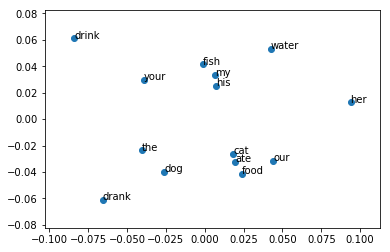

In [13]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [15]:
model.similarity('cat', 'dog')

0.2857181517089141

In [16]:
model.most_similar("cat")

2018-08-31 16:23:40,515 : INFO : precomputing L2-norms of word weight vectors


[(u'his', 0.33836671710014343),
 (u'ate', 0.3089873194694519),
 (u'dog', 0.2857181429862976),
 (u'her', 0.24597755074501038),
 (u'food', 0.22061876952648163),
 (u'my', 0.13203389942646027),
 (u'drank', 0.10320447385311127),
 (u'the', 0.044319577515125275),
 (u'our', -0.09992600232362747),
 (u'fish', -0.22246791422367096)]

In [17]:
model.most_similar("dog")

[(u'drank', 0.3942320644855499),
 (u'cat', 0.2857181429862976),
 (u'his', 0.2756260633468628),
 (u'food', 0.2388916164636612),
 (u'your', 0.1576523631811142),
 (u'the', 0.13757403194904327),
 (u'ate', 0.09862376749515533),
 (u'drink', 0.0795629546046257),
 (u'fish', -0.03772730007767677),
 (u'our', -0.14649657905101776)]